## Thư viện sử dụng

In [7]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import requests
import csv
import datetime
import matplotlib.pyplot as plt

### Cào dữ liệu từ trang web http://quotes.toscrape.com/page/ và lưu kết quả vào file (kq.txt)

In [8]:
url="http://quotes.toscrape.com/page/"
list=[]
for i in range(1,11):
    html=url+str(i)
    linkdata= requests.get(html).content
    soup=BeautifulSoup(linkdata,"html.parser")
    list.append(soup)
with open("kq.txt", mode="w", encoding="utf-8") as f:
    for item in list:
        f.write(str(item))

### a) Đọc tất cả các thẻ html (div) với lớp là "quote" và lưu nó trong biến 'result’

In [9]:
for i in range(1,11):
    html=url+str(i)
    linkdata= requests.get(html).content
    soup=BeautifulSoup(linkdata,"html.parser")
    result = soup.find_all('div', class_='quote')
    print(result)

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K.

### b) Tìm trong biến 'result’ vừa rồi các dữ liệu có chứa nhãn "small" với class là "author"

In [10]:
for i in range(1,11):
    html=url+str(i)
    linkdata= requests.get(html).content
    soup=BeautifulSoup(linkdata,"html.parser")
    result = soup.find_all('div', class_='quote')
    author= [quote.find('small', class_='author').text for quote in result]
    print(author)

['Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Jane Austen', 'Marilyn Monroe', 'Albert Einstein', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt', 'Steve Martin']
['Marilyn Monroe', 'J.K. Rowling', 'Albert Einstein', 'Bob Marley', 'Dr. Seuss', 'Douglas Adams', 'Elie Wiesel', 'Friedrich Nietzsche', 'Mark Twain', 'Allen Saunders']
['Pablo Neruda', 'Ralph Waldo Emerson', 'Mother Teresa', 'Garrison Keillor', 'Jim Henson', 'Dr. Seuss', 'Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Bob Marley']
['Dr. Seuss', 'J.K. Rowling', 'Bob Marley', 'Mother Teresa', 'J.K. Rowling', 'Charles M. Schulz', 'William Nicholson', 'Albert Einstein', 'Jorge Luis Borges', 'George Eliot']
['George R.R. Martin', 'C.S. Lewis', 'Marilyn Monroe', 'Marilyn Monroe', 'Albert Einstein', 'Marilyn Monroe', 'Marilyn Monroe', 'Martin Luther King Jr.', 'J.K. Rowling', 'James Baldwin']
['Jane Austen', 'Eleanor Roosevelt', 'Marilyn Monroe', 'Albert Einstein', 'Haruki Murakami', 'Alexandre Dumas fils', 'St

### c) Hãy viết hàm tacgiaLink() để lấy nội dung của mỗi tác giả *
### d) Lưu kết quả ở câu c vào file Quote.csv *
 *2 câu c, d gộp chung vào đoạn code

In [11]:
# c)Hàm tacgiaLink
def tacgiaLink(link):
    list=[]
    for i in range(1,11):
        html=link+'/page/'+str(i)
        linkdata= requests.get(html).content
        soup=BeautifulSoup(linkdata,"html.parser")
        kq=soup.find_all('div', class_='quote')
        
        for quote in kq:
            aut = quote.find('a')['href']
            auth_name = quote.find('small', class_='author').text
            auth_quote = quote.find('span', class_='text').text
            auth_link = link + aut
            auth_click = requests.get(auth_link).content
            auth_soup = BeautifulSoup(auth_click,"html.parser")
            auth_dBirth = auth_soup.find('span',class_='author-born-date').text
            list.append([auth_name, auth_link, auth_dBirth, auth_quote])

# b)Lưu kết quả vào file Quote.cvs
    with open('Quote.csv',mode='w',newline='',encoding='utf-8') as f:
        w = csv.writer(f)
        w.writerow(['Tacgia','Link','Namsinh','Quote'])
        for row in list:
            w.writerow(row)
            


            
url="http://quotes.toscrape.com"
tacgiaLink(url)

Đọc file Quote.csv

In [12]:
df=pd.read_csv('Quote.csv')
df

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“The world as we have created it is a process ...
1,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965","“It is our choices, Harry, that show what we t..."
2,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“There are only two ways to live your life. On...
3,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775","“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926","“Imperfection is beauty, madness is genius and..."
...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com/author/Harper-Lee,"April 28, 1926",“You never really understand a person until yo...
96,Madeleine L'Engle,http://quotes.toscrape.com/author/Madeleine-LE...,"November 29, 1918",“You have to write the book that wants to be w...
97,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,"November 30, 1835",“Never tell the truth to people who are not wo...
98,Dr. Seuss,http://quotes.toscrape.com/author/Dr-Seuss,"March 02, 1904","“A person's a person, no matter how small.”"


### Đổi dữ liệu cột Namsinh từ text thành date

Phần điền cột tuổi cũng có kết quả cho phần này

In [22]:
df=pd.read_csv('Quote.csv')

df['Namsinh'] = pd.to_datetime(df['Namsinh'], format='%B %d, %Y')

df.to_csv('Quote.csv', index=False)

In [11]:
# xem lại kết quả thay đổi
df=pd.read_csv('Quote.csv')
df

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“The world as we have created it is a process ...
1,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t..."
2,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“There are only two ways to live your life. On...
3,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and..."
...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com/author/Harper-Lee,1926-04-28,“You never really understand a person until yo...
96,Madeleine L'Engle,http://quotes.toscrape.com/author/Madeleine-LE...,1918-11-29,“You have to write the book that wants to be w...
97,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,1835-11-30,“Never tell the truth to people who are not wo...
98,Dr. Seuss,http://quotes.toscrape.com/author/Dr-Seuss,1904-03-02,"“A person's a person, no matter how small.”"


### Thêm cột STT vào dataframe của file Quote.csv

In [13]:
df=pd.read_csv('Quote.csv')

df.insert(0,'STT',range(1,1+len(df)))
df.to_csv('Quote.csv',index=False)
df

,STT,Tacgia,Link,Namsinh,Quote
0,1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“The world as we have created it is a process ...
1,2,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965","“It is our choices, Harry, that show what we t..."
2,3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“There are only two ways to live your life. On...
3,4,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775","“The person, be it gentleman or lady, who has ..."
4,5,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926","“Imperfection is beauty, madness is genius and..."
...,...,...,...,...,...
95,96,Harper Lee,http://quotes.toscrape.com/author/Harper-Lee,"April 28, 1926",“You never really understand a person until yo...
96,97,Madeleine L'Engle,http://quotes.toscrape.com/author/Madeleine-LE...,"November 29, 1918",“You have to write the book that wants to be w...
97,98,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,"November 30, 1835",“Never tell the truth to people who are not wo...
98,99,Dr. Seuss,http://quotes.toscrape.com/author/Dr-Seuss,"March 02, 1904","“A person's a person, no matter how small.”"


### Thêm cột tuổi

Thu nhập dữ liệu năm mất của tác giả đã mất và gán thời gian hiện tại vào tác giả còn sống vào cột NamTinhTuoi

Thư viện sử dụng

In [14]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By

Thu nhập dữ liệu

In [15]:
# Dùng selenium để đăng nhập và truy cập vào trang lấy số năm mất của tác giả đã mất
driver = webdriver.Chrome()
durl = "http://quotes.toscrape.com/login"
driver.get(durl)

#tìm ô username để điền
username = driver.find_element(By.XPATH,"//*[@id='username']")
username.send_keys("a")

#tìm ô password để điền
passw = driver.find_element(By.XPATH,"//*[@id='password']")
passw.send_keys("a")

#tìm nút login và ấn nút login
login_button = driver.find_element(By.XPATH, "//input[@value='Login']")
login_button.click()

# Lấy nội dung của trang web sau khi đã đăng nhập thành công
soup = BeautifulSoup(driver.page_source, "html.parser")

# Lấy soup 10 trang thông tin dữ liệu
death_dates = []
for i in range(0, 11):
    driver.get(f"http://quotes.toscrape.com/page/{i}")
    data_soup = BeautifulSoup(driver.page_source, "html.parser")

    kq=data_soup.find_all('div', class_='quote')

    for quote in kq:
        info_element = quote.find("a", string="(Goodreads page)")
        info_link = info_element.get("href")

        info_link_data = requests.get(info_link)
        soupinfo = BeautifulSoup(info_link_data.text ,"html.parser")

        death_date_tag = soupinfo.find('div', {'class': 'dataItem', 'itemprop': 'deathDate'})
        if death_date_tag is not None:
            death_date = death_date_tag.text
        else:
            death_date = datetime.datetime.now().strftime('%B %d, %Y')
        
        # Lưu từng kết quả của death_date vào list death_dates
        death_dates.append(death_date)

# Tạo dataframe từ list death_dates và lưu vào file csv đã có sẵn với cột mới tên là Tuoi
df = pd.read_csv('Quote.csv')
df['NamTinhTuoi'] = death_dates
df.to_csv('Quote.csv', index=False)

- Kiểm tra kết quả 

In [16]:
df1 = pd.read_csv('Quote.csv')
df1

,STT,Tacgia,Link,Namsinh,Quote,NamTinhTuoi
0,1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“The world as we have created it is a process ...,"April 18, 1955"
1,2,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965","“It is our choices, Harry, that show what we t...","May 20, 2023"
2,3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“There are only two ways to live your life. On...,"April 18, 1955"
3,4,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775","“The person, be it gentleman or lady, who has ...","July 18, 1817"
4,5,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926","“Imperfection is beauty, madness is genius and...","August 05, 1962"
...,...,...,...,...,...,...
95,96,Harper Lee,http://quotes.toscrape.com/author/Harper-Lee,"April 28, 1926",“You never really understand a person until yo...,"February 19, 2016"
96,97,Madeleine L'Engle,http://quotes.toscrape.com/author/Madeleine-LE...,"November 29, 1918",“You have to write the book that wants to be w...,"September 06, 2007"
97,98,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,"November 30, 1835",“Never tell the truth to people who are not wo...,"April 21, 1910"
98,99,Dr. Seuss,http://quotes.toscrape.com/author/Dr-Seuss,"March 02, 1904","“A person's a person, no matter how small.”","September 24, 1991"


- Tính tuổi tác giả dựa trên 2 cột Namsinh và NamTinhTuoi sau đó lưu lại vào file Quote.csv

In [17]:
# Đọc file csv vào dataframe
df = pd.read_csv('Quote.csv')

# Chuyển kiểu dữ liệu của cột năm sinh và năm mất sang datetime
df['Namsinh'] = pd.to_datetime(df['Namsinh'], format='%B %d, %Y')
df['NamTinhTuoi'] = pd.to_datetime(df['NamTinhTuoi'], format='%B %d, %Y')

# Tính số tuổi của họ và lưu vào cột mới tên là Tuoi
df['Tuoi'] = ((df['NamTinhTuoi'] - df['Namsinh']).dt.days / 365).astype(int)
# Xoá đi cột NamTinhTuoi
df.drop('NamTinhTuoi', axis=1, inplace=True)
# Lưu dataframe vào file csv
df.to_csv('Quote.csv', index=False)

In [18]:
df = pd.read_csv('Quote.csv')
df

,STT,Tacgia,Link,Namsinh,Quote,Tuoi
0,1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“The world as we have created it is a process ...,76
1,2,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",57
2,3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“There are only two ways to live your life. On...,76
3,4,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",41
4,5,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",36
...,...,...,...,...,...,...
95,96,Harper Lee,http://quotes.toscrape.com/author/Harper-Lee,1926-04-28,“You never really understand a person until yo...,89
96,97,Madeleine L'Engle,http://quotes.toscrape.com/author/Madeleine-LE...,1918-11-29,“You have to write the book that wants to be w...,88
97,98,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,1835-11-30,“Never tell the truth to people who are not wo...,74
98,99,Dr. Seuss,http://quotes.toscrape.com/author/Dr-Seuss,1904-03-02,"“A person's a person, no matter how small.”",87


### Thống kê số lượng tác giả

In [19]:
demtacgia=df['Tacgia'].unique()
print('Số lượng tác giả thống kê: ',len(demtacgia))

Số lượng tác giả thống kê:  50


### Thống kê các câu nói của tác giả

In [20]:
author_counts = df['Tacgia'].value_counts()
print(author_counts)

Albert Einstein           10
J.K. Rowling               9
Marilyn Monroe             7
Dr. Seuss                  6
Mark Twain                 6
C.S. Lewis                 5
Jane Austen                5
Bob Marley                 3
Eleanor Roosevelt          2
Charles Bukowski           2
Suzanne Collins            2
George R.R. Martin         2
Ralph Waldo Emerson        2
Mother Teresa              2
Ernest Hemingway           2
J.D. Salinger              1
George Bernard Shaw        1
J.R.R. Tolkien             1
Alfred Tennyson            1
Terry Pratchett            1
John Lennon                1
George Carlin              1
W.C. Fields                1
Ayn Rand                   1
Jimi Hendrix               1
J.M. Barrie                1
E.E. Cummings              1
Khaled Hosseini            1
Harper Lee                 1
Helen Keller               1
Haruki Murakami            1
Stephenie Meyer            1
Garrison Keillor           1
Thomas A. Edison           1
Douglas Adams 

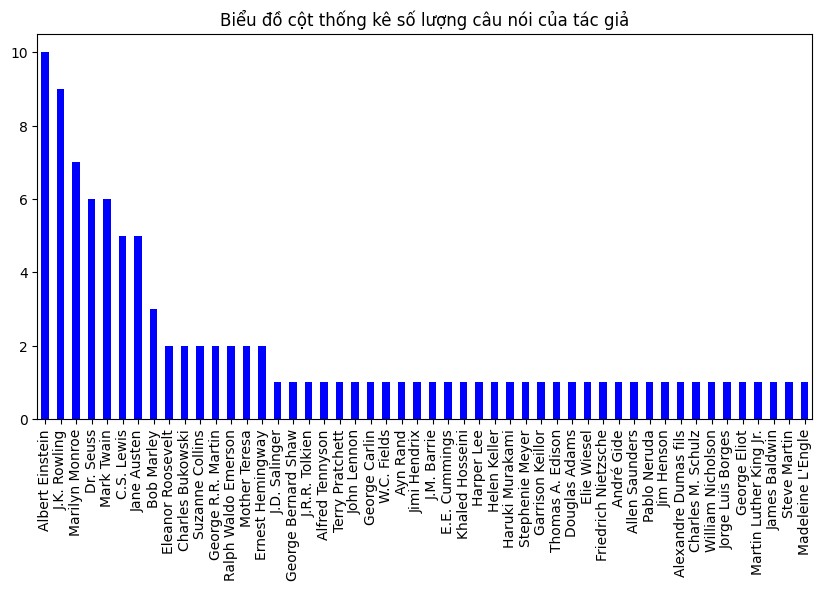

In [21]:
# vẽ biểu đồ cột thống kê số lượng câu nói
df['Tacgia'].value_counts().plot(kind='bar',color='blue', figsize=(10, 5), title='Biểu đồ cột thống kê số lượng câu nói của tác giả')
plt.show()

### Thông tin và thống kê câu nói ngắn nhất và câu nói dài nhất

In [22]:
def sotu(sentence):
    word_count = len(sentence.split())
    print("Số từ trong câu nói: ", word_count)
    
vitricaungan = df['Quote'].str.len().idxmin()
vitricaudai = df['Quote'].str.len().idxmax()

caungan = df['Quote'][vitricaungan]
caudai = df['Quote'][vitricaudai]

tgcaungan = df['Tacgia'][vitricaungan]
tgcaudai = df['Tacgia'][vitricaudai]

print("Câu ngắn nhất: ", caungan)
sotu(caungan)
print("Tác giả câu ngắn nhất: ", tgcaungan)
print("Câu dài nhất: ", caudai)
sotu(caudai)
print("Tác giả câu dài nhất: ", tgcaudai)


Câu ngắn nhất:  “We read to know we're not alone.”
Số từ trong câu nói:  7
Tác giả câu ngắn nhất:  William Nicholson
Câu dài nhất:  “This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always

### Thống kê các từ xuất hiện trong các câu nói 

In [23]:
# thống kê các từ được sử dụng trong dataframe
words = df['Quote'].str.split(expand=True).stack().value_counts()
print(words)

you          76
to           69
is           67
a            60
the          55
             ..
course        1
happening     1
head,         1
why           1
edge.”        1
Length: 906, dtype: int64


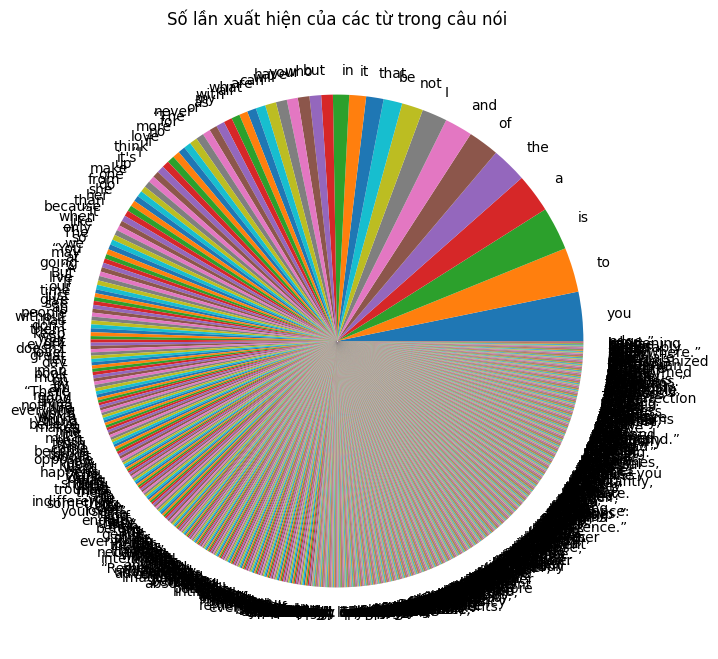

In [24]:

# vẽ biểu đồ thể hiện số lượng từ 
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(words.values, labels=words.index)
ax.set_title('Số lần xuất hiện của các từ trong câu nói')
plt.show()

### Trích xuất đặc trưng

### Thư viện sử dụng

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv("Quote.csv")
data

,STT,Tacgia,Link,Namsinh,Quote,Tuoi
0,1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“The world as we have created it is a process ...,76
1,2,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",57
2,3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“There are only two ways to live your life. On...,76
3,4,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",41
4,5,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",36
...,...,...,...,...,...,...
95,96,Harper Lee,http://quotes.toscrape.com/author/Harper-Lee,1926-04-28,“You never really understand a person until yo...,89
96,97,Madeleine L'Engle,http://quotes.toscrape.com/author/Madeleine-LE...,1918-11-29,“You have to write the book that wants to be w...,88
97,98,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,1835-11-30,“Never tell the truth to people who are not wo...,74
98,99,Dr. Seuss,http://quotes.toscrape.com/author/Dr-Seuss,1904-03-02,"“A person's a person, no matter how small.”",87


In [27]:
# Trích xuất đặc trưng từ câu nói nổi tiếng
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(data['Quote'])

# Tạo DataFrame mới chứa các đặc trưng
feature_df = pd.DataFrame(features.toarray())
feature_names = feature_df.columns.tolist()
feature_df.columns = feature_names

# Kết hợp với dữ liệu gốc
merged_df = pd.concat([data, feature_df], axis=1)

# In kết quả
merged_df

,STT,Tacgia,Link,Namsinh,Quote,Tuoi,0,1,2,3,...,653,654,655,656,657,658,659,660,661,662
0,1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“The world as we have created it is a process ...,76,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",57,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“There are only two ways to live your life. On...,76,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",41,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Harper Lee,http://quotes.toscrape.com/author/Harper-Lee,1926-04-28,“You never really understand a person until yo...,89,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
96,97,Madeleine L'Engle,http://quotes.toscrape.com/author/Madeleine-LE...,1918-11-29,“You have to write the book that wants to be w...,88,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
97,98,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,1835-11-30,“Never tell the truth to people who are not wo...,74,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,99,Dr. Seuss,http://quotes.toscrape.com/author/Dr-Seuss,1904-03-02,"“A person's a person, no matter how small.”",87,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Hết